# Kelompok 10 - PCD A

- Rionando Soksein Putra - 11221063
- Fanky Wellsy Pongoh - 11221021
- Samuel Benedicto Siahaan - 11221064

# Download Dataset

**Brain Tumor MRI Dataset**  

adalah sebuah dataset yang berisi kumpulan gambar MRI (Magnetic Resonance Imaging) dari otak manusia yang mencakup berbagai kasus tumor otak. Dataset ini biasanya mencakup gambar-gambar yang menunjukkan berbagai jenis tumor otak, serta metadata yang terkait dengan setiap gambar, seperti diagnosis, ukuran tumor, lokasi tumor, dan informasi klinis lainnya.


Alasan pemilihan dataset ini adalah karena dataset Brain Tumor MRI menyediakan data yang sangat relevan dan spesifik untuk penelitian dan pengembangan algoritma dalam bidang pengolahan citra medis, khususnya untuk deteksi dan klasifikasi tumor otak. Dengan menggunakan dataset ini, kelompok kami dapat mengembangkan dan menguji model machine learning atau deep learning yang dapat membantu dalam diagnosis dini dan akurasi deteksi tumor otak, yang pada akhirnya dapat meningkatkan hasil pengobatan dan perawatan pasien. Selain itu, dataset ini juga memungkinkan untuk eksplorasi berbagai teknik pengolahan citra digital, seperti segmentasi, ekstraksi fitur, dan analisis pola, yang semuanya sangat penting dalam bidang medis.

In [1]:
!curl -L -o brain-tumor-mri-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/masoudnickparvar/brain-tumor-mri-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  148M    0 49098    0     0  41914      0  1:01:56  0:00:01  1:01:55 41914
  0  148M    0 1502k    0     0   727k      0  0:03:29  0:00:02  0:03:27 1625k
 10  148M   10 15.5M    0     0  5198k      0  0:00:29  0:00:03  0:00:26 8382k
 22  148M   22 33.0M    0     0  8263k      0  0:00:18  0:00:04  0:00:14 11.2M
 29  148M   29 43.2M    0     0  8737k      0  0:00:17  0:00:05  0:00:12 11.0M
 39  148M   39 58.3M    0     0  9839k      0  0:00:15  0:00:06  0:00:09 11.8M
 46  148M   46 68.6M    0     0  9897k      0  0:00:15  0:00:07  0:00:08 13.3M
 53  148M   53 79.8M    0     0   9.8M      0  0:0

In [2]:
import zipfile
import os

zip_path = 'brain-tumor-mri-dataset.zip'

extract_to = 'brain-tumor-mri-dataset'

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted to '{extract_to}'")


Extracted to 'brain-tumor-mri-dataset'


# Import Library

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Image Pre-Processing

Image preprocessing adalah sebuah tahapan untuk memproses semua gambar agar menjadi informasi yang bisa digunakan dengan lebih efektif.

Beberapa hal yang bisa dilakukan adalah dengan melakukan hal-hal seperti  *enhancment*  dan konversi kanal warna. (RGB -> Grayscale maupun sebaliknya)

## Utility Function

In [4]:
"""
Utility function untuk menampilkan gambar berdasarkan path yang diberikan
"""
def show_img(path):
  print(cv.imread(path, cv.IMREAD_GRAYSCALE).shape)
  return plt.imshow(cv.imread(path, cv.IMREAD_GRAYSCALE), cmap='gray')

In [5]:
"""
Utility function untuk mengubah gambar bgr ke grayscale
"""
def bgr_to_graysacle(path):
  img = cv.imread(path)
  img = cv.resize(img, (350, 350))
  B, G, R = img[:, :, 0], img[:, :, 1], img[:, :, 2]

  # Ubah menjadi grayscale dengan rumus luminance
  gray_image = 0.2126 * R + 0.7152 * G + 0.0722 * B

  return gray_image

In [6]:
"""
Utility function untuk menambahkan gaussion noise pada gambar
"""
def add_gaussian_noise(path, mean=0, var=0.04):
    image = cv.imread(path, cv.IMREAD_COLOR)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Ambil ukuran dimensi gambar (baris, kolom, dan channel warna)
    row, col, ch = image.shape

    # Hitung simpangan baku dari varian (sigma = akar dari varian)
    sigma = var ** 0.5

    # Buat noise Gaussian dengan distribusi normal (mean, sigma)
    gauss = np.random.normal(mean, sigma, (row, col, ch))

    # Tambahkan noise ke gambar asli
    noisy = image + gauss

    # Batasi nilai piksel hasil antara 0 dan 255, lalu ubah ke uint8
    return np.clip(noisy, 0, 255).astype(np.uint8)

In [7]:
"""
Utility function untuk menambahkan salt & pepper noise pada gambar
"""
def add_salt_and_pepper_noise(path, salt_vs_pepper=0.05, amount=0.02):
    image = cv.imread(path)
    # Ambil ukuran gambar: baris, kolom, dan channel warna
    row, col, ch = image.shape

    # Salin gambar asli agar tidak merusak data asli
    noisy = np.copy(image)

    # Hitung jumlah pixel yang akan diubah menjadi "salt"
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)

    # Tentukan koordinat acak untuk noise salt pada setiap dimensi gambar
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 255 putih
    noisy[coords[0], coords[1], :] = 255

    # Hitung jumlah pixel yang akan diubah menjadi "pepper"
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))

    # Tentukan koordinat acak untuk noise pepper
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 0 (hitam)
    noisy[coords[0], coords[1], :] = 0

    # Kembalikan gambar yang sudah diberi noise salt and pepper
    return noisy

In [8]:
"""
Utility function untuk menambahkan possion noise pada gambar
"""
def add_poisson_noise(path):
    image = cv.imread(path)

    vals = len(np.unique(image))

    # Cari nilai power of two yang paling dekat
    vals = 2 ** np.ceil(np.log2(vals))

    # Terapkan noise Poisson pada gambar dengan mengalikan dulu gambar dengan 'vals'
    noisy = np.random.poisson(image * vals) / float(vals)

    # Batasi nilai hasil ke rentang [0, 255] dan ubah ke tipe uint8
    return np.clip(noisy, 0, 255).astype(np.uint8)

In [9]:
def brighten_filter(image, beta=50):
    """
    Menerapkan filter terang pada citra.

    Args:
        image: Citra input (NumPy array).
        beta: Nilai penambahan intensitas (integer).

    Returns:
        Citra yang sudah diberi filter terang.
    """
    # Pastikan nilai beta berada dalam rentang yang valid [0, 255]
    beta = max(0, min(beta, 255))

    # Tambahkan nilai beta ke setiap piksel
    brightened_image = cv.add(image, beta)

    return brightened_image

In [10]:
def biner(img):
  citra_biner = np.zeros_like(img)
  h, w = img.shape[:2]
  for y in range(h):
    for x in range(w):
      if img[y, x] < 128:
        citra_biner[y, x] = 0
      else:
        citra_biner[y, x] = 1

  return citra_biner

In [11]:
"""
utility function untuk melakukan konvolusi ke gambar yang dibeirkan,
tipe konvolusi yang tersedia adalah -> Original, Blur (Mean), Gaussian Blur, Sharpen, Edge Detection (Sobel X), Emboss
"""
def apply_conv(img, conv_type):
  kernels = {
    # Kernel "Original" hanya sebagai placeholder, tidak melakukan perubahan (akan digunakan gambar asli).
    'Original': np.array([[0]]),

    # Kernel "Blur (Mean)" untuk meratakan piksel dengan mengambil rata-rata dari 9 piksel sekitarnya (3x3).
    # Digunakan untuk menghaluskan atau mengurangi noise pada citra.
    'Blur (Mean)': np.ones((3, 3), np.float32) / 9,

    # Kernel "Gaussian Blur" menggunakan distribusi Gaussian untuk blur yang lebih halus dan alami.
    # Dibuat dengan mengalikan kernel Gaussian 1D secara baris dan kolom untuk mendapatkan 2D kernel.
    'Gaussian Blur': cv.getGaussianKernel(3, 0) @ cv.getGaussianKernel(3, 0).T,

    # Kernel "Sharpen" meningkatkan kontras dan menonjolkan tepi objek.
    # Piksel tengah bernilai tinggi (5), piksel sekitarnya negatif (-1), hasilnya tampak lebih tajam.
    'Sharpen': np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]]),

    # Kernel "Edge Detection (Sobel X)" mendeteksi tepi secara horizontal (vertikal pada gambar).
    # Nilai negatif di kiri dan positif di kanan akan memperlihatkan perbedaan intensitas horizontal.
    'Edge Detection (Sobel X)': np.array([[-1, 0, 1],
                                          [-2, 0, 2],
                                          [-1, 0, 1]]),

    # Kernel "Emboss" memberikan efek timbul atau 3D pada gambar.
    # Menghasilkan bayangan seolah-olah cahaya datang dari arah tertentu.
    'Emboss': np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])
  }
  if conv_type not in kernels:
        return img

  if conv_type == 'Original':
      return img
  else:
      kernel = kernels[conv_type]
      return cv.filter2D(img, -1, kernel)

In [12]:
"""
Utlity function untuk membuat pipeline dari semua preprocessing pada gambar.
baca gambar -> tambah noise -> grayscale -> apply conv -> binarisasi (opsional) -> return gambar yang sudah diproses
input params,
conv_type = 'Original', 'Blur (Mean)', 'Gaussian Blur', 'Sharpen', 'Edge Detection (Sobel X)', 'Emboss'
noise_kind = snp, poisson, gaussian, none
if snp, config = {amount -> float, salt_vs_pepper: float}
else if gaussian, config = {var -> float, mean: float}
"""
def image_procesing_pipeline(path, noise_kind='snp', config={}, is_binary=True, conv_type='original'):
  image = cv.imread(path)
  image = cv.resize(image, (350, 350))

  if noise_kind == 'snp':
    row, col, ch = image.shape
    amount = config.get('amount', 0.02)
    salt_vs_pepper = config.get('salt_vs_pepper', 0.05)

    # Salin gambar asli agar tidak merusak data asli
    noisy = np.copy(image)

    # Hitung jumlah pixel yang akan diubah menjadi "salt"
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)

    # Tentukan koordinat acak untuk noise salt pada setiap dimensi gambar
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 255 putih
    noisy[coords[0], coords[1], :] = 255

    # Hitung jumlah pixel yang akan diubah menjadi "pepper"
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))

    # Tentukan koordinat acak untuk noise pepper
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 0 (hitam)
    noisy[coords[0], coords[1], :] = 0

    # Kembalikan gambar yang sudah diberi noise salt and pepper
    image = noisy

  elif noise_kind == 'poisson':
    vals = len(np.unique(image))

    # Cari nilai power of two yang paling dekat
    vals = 2 ** np.ceil(np.log2(vals))

    # Terapkan noise Poisson pada gambar dengan mengalikan dulu gambar dengan 'vals'
    noisy = np.random.poisson(image * vals) / float(vals)

    # Batasi nilai hasil ke rentang [0, 255] dan ubah ke tipe uint8
    image = np.clip(noisy, 0, 255).astype(np.uint8)

  elif noise_kind == 'gaussian':
    # Ambil ukuran dimensi gambar (baris, kolom, dan channel warna)
    row, col, ch = image.shape

    var = config.get('var', 0.04)
    mean = config.get('mean', 0)

    # Hitung simpangan baku dari varian (sigma = akar dari varian)
    sigma = var ** 0.5

    # Buat noise Gaussian dengan distribusi normal (mean, sigma)
    gauss = np.random.normal(mean, sigma, (row, col, ch))

    # Tambahkan noise ke gambar asli
    noisy = image + gauss

    # Batasi nilai piksel hasil antara 0 dan 255, lalu ubah ke uint8
    image = np.clip(noisy, 0, 255).astype(np.uint8)

  B, G, R = image[:, :, 0], image[:, :, 1], image[:, :, 2]
  gray_image = (0.2126 * R + 0.7152 * G + 0.0722 * B).astype(np.uint8)

  image = np.array(apply_conv(gray_image, conv_type))

  if is_binary:
    image = biner(gray_image)

  return image

In [13]:
"""
Utility function untuk menampilkan histogram dari gambar yang diberikan
"""
def show_histogram(img, title="Histogram warna gambar"):
    plt.figure(figsize=(6, 4))
    plt.hist(img.flatten(), bins=256, range=[0, 256], color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

## Preprocessing

In [14]:
cv.imread('Training/glioma/Tr-glTr_0000.jpg').shape, cv.imread('Training/meningioma/Tr-meTr_0000.jpg').shape, cv.imread('Training/notumor/Tr-noTr_0000.jpg').shape, cv.imread('Training/pituitary/Tr-piTr_0000.jpg').shape

((512, 512, 3), (512, 512, 3), (350, 350, 3), (512, 512, 3))

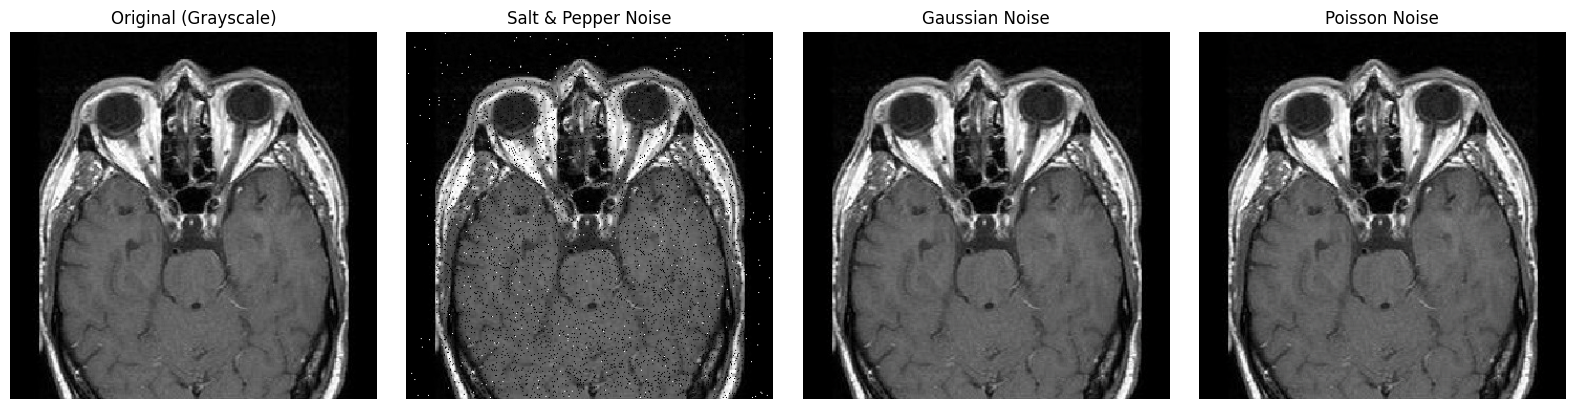

In [15]:
glioma_img = 'Training/glioma/Tr-glTr_0000.jpg'
meningioma_img = 'Training/meningioma/Tr-meTr_0000.jpg'
notumor_img = 'Training/notumor/Tr-noTr_0000.jpg'
pituitary_img = 'Training/pituitary/Tr-piTr_0000.jpg'

plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(bgr_to_graysacle(notumor_img), cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(add_salt_and_pepper_noise(notumor_img))
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(add_gaussian_noise(notumor_img))
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(add_poisson_noise(notumor_img))
plt.title('Poisson Noise')
plt.axis('off')

plt.tight_layout()
plt.show()

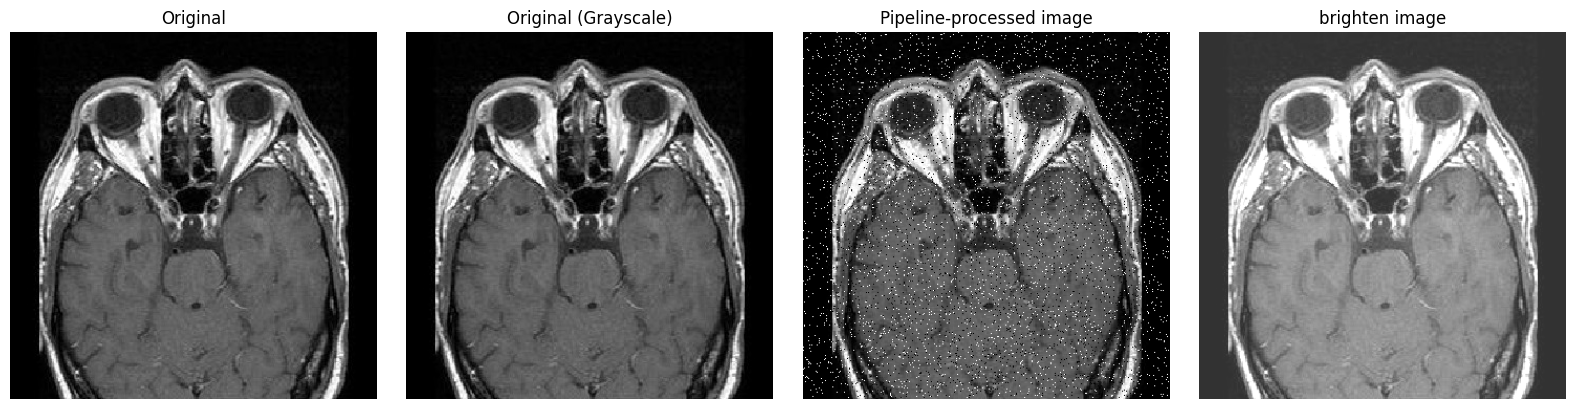

In [16]:
processeed_img = image_procesing_pipeline(notumor_img, noise_kind='snp', config={'amount': 0.02, 'salt_vs_pepper': 0.5}, is_binary=False)
brighten_img = brighten_filter(cv.imread(notumor_img), beta=50)

plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv.imread(notumor_img), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(bgr_to_graysacle(notumor_img), cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(processeed_img, cmap='gray')
plt.title('Pipeline-processed image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(brighten_img, cmap='gray')
plt.title('brighten image')
plt.axis('off')

plt.tight_layout()
plt.show()

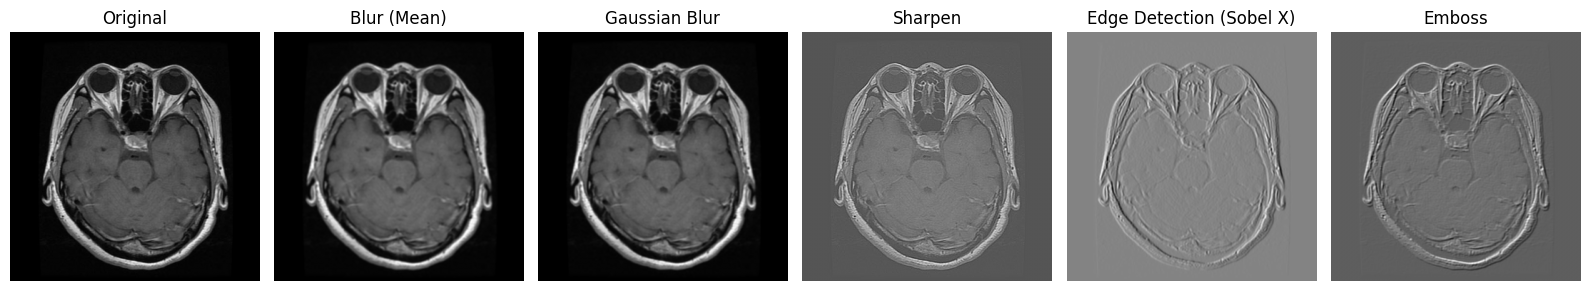

In [17]:
img = bgr_to_graysacle(pituitary_img) # Ubah disini aja nanti gambar yang mau diliat
blur_img = apply_conv(img, 'Blur (Mean)')
gaussian_img = apply_conv(img, 'Gaussian Blur')
sharpen_img = apply_conv(img, 'Sharpen')
edge_img = apply_conv(img, 'Edge Detection (Sobel X)')
emboss_img = apply_conv(img, 'Emboss')

plt.figure(figsize=(16, 4))

plt.subplot(1, 6, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(blur_img, cmap='gray')
plt.title('Blur (Mean)')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(sharpen_img, cmap='gray')
plt.title('Sharpen')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(edge_img, cmap='gray')
plt.title('Edge Detection (Sobel X)')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(emboss_img, cmap='gray')
plt.title('Emboss')
plt.axis('off')

plt.tight_layout()
plt.show()

Dari hasil konvolusi, sepertinya jika menggunakan edge detection dan emboss, akan ada terlalu banyak fitur penting yang akan menghilang.

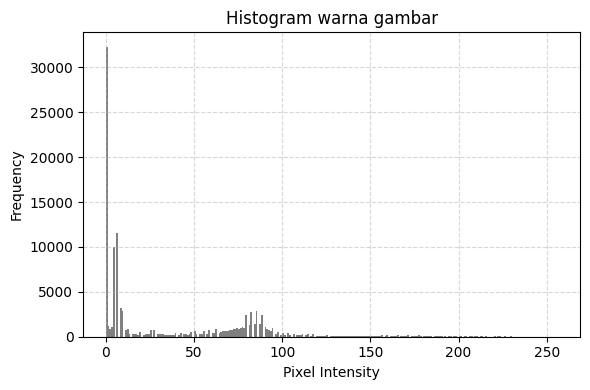

In [18]:
hist_normal = show_histogram(img) # Ubah disini gambar yang mau diliat warnanya (harus grayscale)

# Model Machine Learning

## Utility Function

In [19]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# conv_type = 'Original', 'Blur (Mean)', 'Gaussian Blur', 'Sharpen', 'Edge Detection (Sobel X)', 'Emboss'
def load_images_from_folder(folder_path, conv_type=None):
    images = []
    labels = []
    classes = sorted(os.listdir(folder_path))
    class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            processed_img = None

            if not conv_type:
              processed_img = image_procesing_pipeline(img_path)
            elif conv_type:
              processed_img = image_procesing_pipeline(img_path, conv_type)

            images.append(processed_img)
            labels.append(class_to_idx[class_name])

    return np.array(images), np.array(labels)

def train_and_evaluate_model(training_folder, test_folder, conv_type=None):
    X_train, y_train = load_images_from_folder(training_folder, conv_type)
    X_test, y_test = load_images_from_folder(test_folder, conv_type)

    model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(350, 350, 1)),
      MaxPooling2D(),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(128, activation='relu'),
      Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train)
    model.evaluate(X_test, y_test)

    model.save(f"model_{'none' if not conv_type else str(conv_type)}.h5")

    return model

## Feature and label preprocessing

In [20]:
train_folder = "Training"
test_folder = "Testing"

# tidak ada konvolusi yang diberikan
X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)

In [21]:
len(X_train), len(y_train), len(X_test), len(y_test)

(5712, 5712, 1311, 1311)

In [22]:
np.array(X_train[0]).shape

(350, 350)

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Model Training and testing

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [25]:
# conv_type = 'Original', 'Blur (Mean)', 'Gaussian Blur', 'Sharpen', 'Edge Detection (Sobel X)', 'Emboss'
train_and_evaluate_model(train_folder, test_folder, conv_type='Original') # Ini gak pake konvolusi apa apa

c:\Users\Zenith\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 391ms/step - accuracy: 0.6675 - loss: 0.7887
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.7690 - loss: 0.5234


<Sequential name=sequential, built=True>

In [26]:
train_and_evaluate_model(train_folder, test_folder, conv_type='Edge Detection (Sobel X)') # ini pake konvolusi edge detection

179/179 ━━━━━━━━━━━━━━━━━━━━ 71s 389ms/step - accuracy: 0.6514 - loss: 0.8409
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.8030 - loss: 0.4844


<Sequential name=sequential_1, built=True>

In [27]:
train_and_evaluate_model(train_folder, test_folder, conv_type='Sharpen') # ini pake konvolusi sharpen

179/179 ━━━━━━━━━━━━━━━━━━━━ 70s 389ms/step - accuracy: 0.6213 - loss: 1.0136
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.8010 - loss: 0.4868


<Sequential name=sequential_2, built=True>

Bisa dilihat diatas, hasil evaluasi model yang ditrain